> # Detecting Pneumonia give Chest Xrays

---

So What is Pneumonia? firstly, So Pneumonia is an infection of the lungs with a range of possible causes. It can be a serious and life-threatening disease. It normally starts with a bacterial, viral, or fungal infection.

As we have understood about Pnumonia and it's causes, the main objective here for us is to learn about ConvNets that are Convolutional Networks so how a convolutional neural network works:

### Convolutional Neural Networks (ConvNets) :

#### In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of deep neural networks, most commonly applied to analyzing visual imagery. They are also known as shift invariant or space invariant artificial neural networks (SIANN), based on their shared-weights architecture and translation invariance characteristics.[1][2] They have applications in image and video recognition, recommender systems,[3] image classification, medical image analysis, and natural language processing. and yes this is copied from wikipedia. but to make it interesting and informative i have to do what it takes , becuase as our heroes said.

<div align="center" style="height:200px,width:200px">
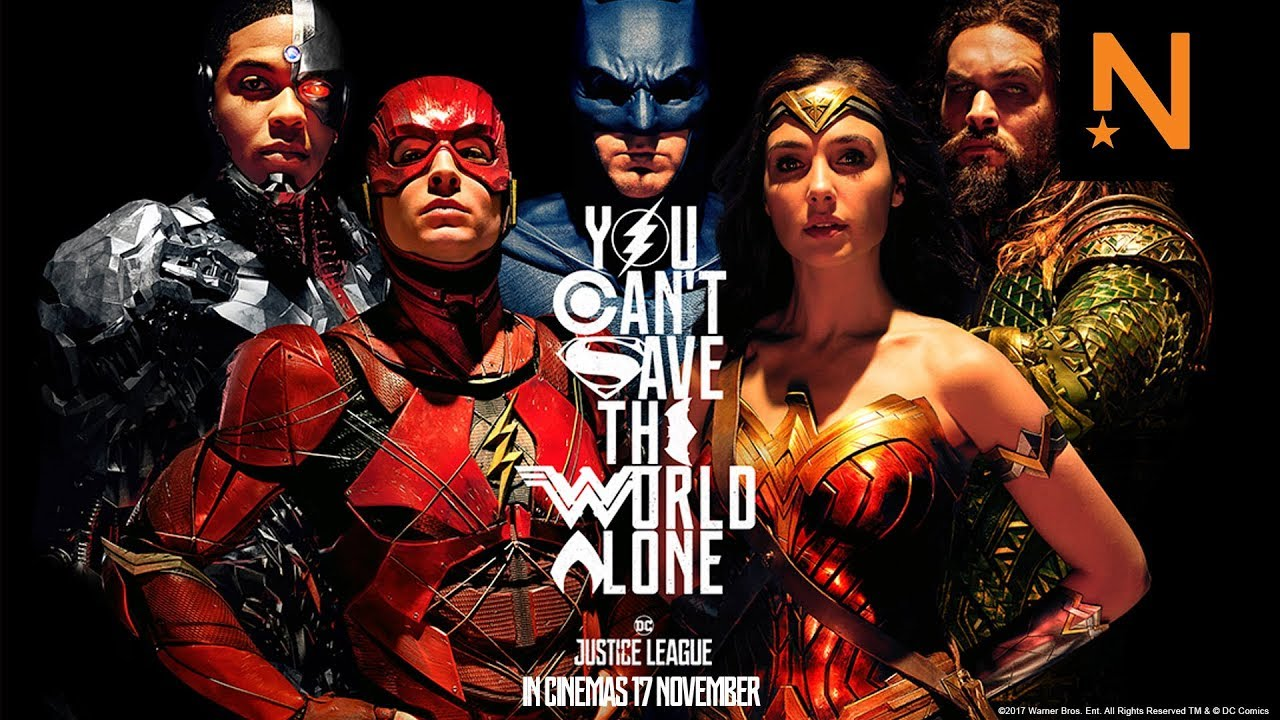
</div>  



#### So in Layman's term a ConvNet is a technique in computer vision to make the algorithm “see” the picture at a deeper level as a composition of various edges, lines, corners and somehow capture the contents of the image.


## Getting Some more details on Convnets
---

#### So what happens? as we all know that how we see an image is not like what a computer sees, for computer it's just a matrix of rows and columns, and that to filled with a binary representation of 0s and 1s 

## Mind-Blowing isn't it, yeah sure thats a lot of work.

So what happens in the backgorund is we impletement a frame(i.e a matrix) whatever the number may be 2x2 , 3x3 and it passes by the original image and calculates a summation and stores it in respectable slot as you can see from the below gif

<div align="center">
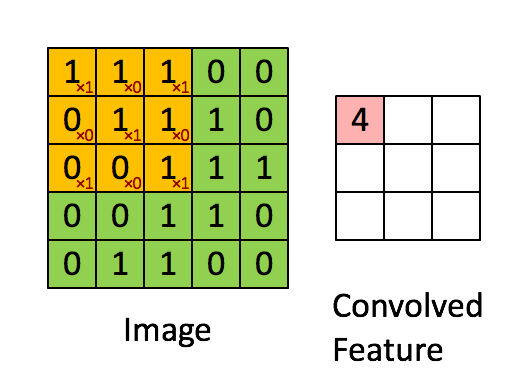
    </div>
    




# Max-Pooling :

#### **This is just the convolution layer part, the fun begans at the MaxPooling layer, where we also use a matrix(matrix2) and stride it over matrix1 and find the maximum values and store them in matrix2.**


<div align="center">
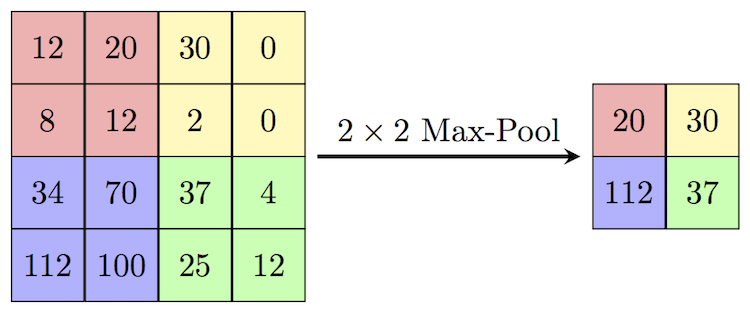
    </div>


## And wow, thats how Feature Extraction is done, and this small features combine and give us the correct result. 




# <div style="color:red">Note : Quiz time find the libraries that I included but never used, comment below.</div>

In [1]:
# Importing all the libraris we need

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
import cv2
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Dropout
from keras.layers import Dense , Flatten 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing.image import ImageDataGenerator , load_img
from keras.optimizers import SGD
import os

Using TensorFlow backend.


In [2]:
for dirname, _, filenames in os.walk("/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray"):
    print(dirname)

# Dividing the folders, as per training , testing , Normal , Pneumonia 
chest_xray_train_normal = os.listdir("/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/")
chest_xray_train_pneumonia = os.listdir("/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/")
chest_xray_test_normal = os.listdir("/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL")
chest_xray_test_pneumonia = os.listdir("/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA")

# To store the file names and category
filenames = []
Category = []

# Appending all the normal images to filenames and category to Category
for file in chest_xray_train_normal:
    filenames.append(file)
    Category.append("NORMAL")
    
# Appending all the pneumonia images to filenames and category to Category
for file in chest_xray_train_pneumonia:
    filenames.append(file)
    Category.append("PNEUMONIA")
    
# To find the total number of observations we have
print(len(filenames))
print(len(Category))

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/NORMAL
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA
5218
5218


In [3]:
# Creating a Dataframe although we are not going to use one, just to show how you can create a dataframe 

df_train = pd.DataFrame({
    "Files" : filenames,
    "Category" : Category
})

df_train.head(10)

,Files,Category
0,NORMAL2-IM-0569-0001.jpeg,NORMAL
1,NORMAL2-IM-0523-0001.jpeg,NORMAL
2,NORMAL2-IM-1285-0001.jpeg,NORMAL
3,NORMAL2-IM-1262-0001.jpeg,NORMAL
4,NORMAL2-IM-1017-0001.jpeg,NORMAL
5,NORMAL2-IM-0971-0001-0002.jpeg,NORMAL
6,NORMAL2-IM-0937-0001.jpeg,NORMAL
7,IM-0561-0001.jpeg,NORMAL
8,IM-0425-0001.jpeg,NORMAL
9,IM-0372-0001.jpeg,NORMAL


In [4]:
df_train.tail(10)

,Files,Category
5208,person7_bacteria_29.jpeg,PNEUMONIA
5209,person1238_virus_2098.jpeg,PNEUMONIA
5210,person1507_bacteria_3948.jpeg,PNEUMONIA
5211,person1491_virus_2597.jpeg,PNEUMONIA
5212,person1555_bacteria_4059.jpeg,PNEUMONIA
5213,person675_bacteria_2569.jpeg,PNEUMONIA
5214,person509_virus_1025.jpeg,PNEUMONIA
5215,person162_virus_320.jpeg,PNEUMONIA
5216,person1637_bacteria_4339.jpeg,PNEUMONIA
5217,person1538_bacteria_4021.jpeg,PNEUMONIA


In [5]:
# Same thing as training, but this is for testing

test_files = []
test_category = []
for file in chest_xray_test_normal:
    test_files.append(file)
    test_category.append("NORMAL")

for file in chest_xray_test_pneumonia:
    test_files.append(file)
    test_category.append("PNEUMONIA")
    
print(len(test_files))
print(len(test_category))

624
624


In [6]:
df_test = pd.DataFrame({
    "Files" : test_files,
    "Category" : test_category
})

df_test.head(10)

,Files,Category
0,IM-0059-0001.jpeg,NORMAL
1,NORMAL2-IM-0321-0001.jpeg,NORMAL
2,NORMAL2-IM-0198-0001.jpeg,NORMAL
3,NORMAL2-IM-0303-0001.jpeg,NORMAL
4,NORMAL2-IM-0027-0001.jpeg,NORMAL
5,NORMAL2-IM-0272-0001.jpeg,NORMAL
6,NORMAL2-IM-0195-0001.jpeg,NORMAL
7,NORMAL2-IM-0362-0001.jpeg,NORMAL
8,NORMAL2-IM-0131-0001.jpeg,NORMAL
9,NORMAL2-IM-0372-0001.jpeg,NORMAL


In [7]:
df_test.tail(10)

,Files,Category
614,person104_bacteria_491.jpeg,PNEUMONIA
615,person86_bacteria_429.jpeg,PNEUMONIA
616,person113_bacteria_543.jpeg,PNEUMONIA
617,person125_bacteria_595.jpeg,PNEUMONIA
618,person133_bacteria_638.jpeg,PNEUMONIA
619,person1628_virus_2822.jpeg,PNEUMONIA
620,person109_bacteria_517.jpeg,PNEUMONIA
621,person1653_virus_2858.jpeg,PNEUMONIA
622,person21_virus_52.jpeg,PNEUMONIA
623,person54_virus_109.jpeg,PNEUMONIA


In [8]:
# It's better to know the dimensions of the image before preprocessing

#to read the image
img = cv2.imread("/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0569-0001.jpeg")

#this will return dimensions of the image and store it in dimensions variable 
dimensions = img.shape

# Printing the dimensions 
print("Dimensions : ",dimensions)
print("Height : ",dimensions[0])
print("Width : ",dimensions[1])
print("Channels : ",dimensions[2])

Dimensions :  (1160, 1724, 3)
Height :  1160
Width :  1724
Channels :  3


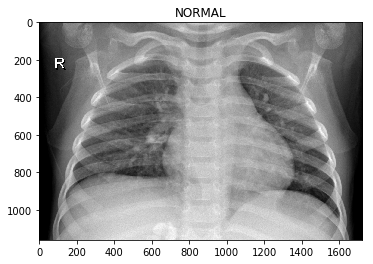

In [9]:
# Plotting image of a Chest X-ray that is Normal

image_title = "NORMAL"
img = load_img("/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0569-0001.jpeg")

plt.imshow(img)
plt.title(image_title)
plt.show()

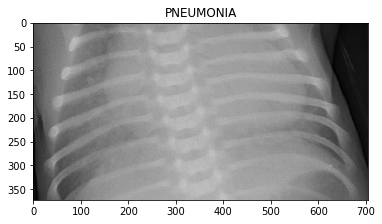

In [10]:
# Plotting image of a Chest X-ray that is affected by Pneumonia 

image_title = "PNEUMONIA"
img = load_img("/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person675_bacteria_2569.jpeg")

plt.imshow(img)
plt.title(image_title)
plt.show()

In [11]:
# Converting the images from original dimensions to (128,128,3)

X_train = []
Y_train = []
x_test = []
y_test = []

for file in chest_xray_train_normal:
    try:
        img = cv2.imread("/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/"+file,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(128,128))
    
        X_train.append(np.array(img))
        Y_train.append("NORMAL")

    except:
        pass
        
for file in chest_xray_train_pneumonia:
    try :
        img = cv2.imread("/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/"+file,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(128,128))
    
        X_train.append(np.array(img))
        Y_train.append("PNUEMONIA")
        
    except: 
        pass 

for file in chest_xray_test_normal:
    
    try:
        #print(file)
        img = cv2.imread("/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL/"+file,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(128,128))
    
        x_test.append(np.array(img))
        y_test.append("NORMAL")
    
    except:
        pass
    
for file in chest_xray_test_pneumonia:
    
    try:
        img = cv2.imread("/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA/"+file,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(128,128))
    
        x_test.append(np.array(img))
        y_test.append("PNUEMONIA")    
    
    except:
        pass

print("Total size of X_train is: ",len(X_train))
print("Total size of Y_train is: ",len(Y_train))
print("Total size of x_test is: ",len(x_test))
print("Total size of y_test is: ",len(y_test))

Total size of X_train is:  5216
Total size of Y_train is:  5216
Total size of x_test is:  624
Total size of y_test is:  624


In [12]:
dimensions = X_train[1].shape
print("The shape of Image is : ",dimensions)
print("Height of Image is : ",dimensions[0])
print("Width of Image is : ",dimensions[1])
print("Number of channels : ",dimensions[2])

The shape of Image is :  (128, 128, 3)
Height of Image is :  128
Width of Image is :  128
Number of channels :  3


In [13]:
# This variables were lists we need to convert them to numpy arrays

X_train = np.array(X_train)
x_test = np.array(x_test)
Y_train = np.array(Y_train)
y_test = np.array(y_test)

In [14]:
Y_train.shape

(5216,)

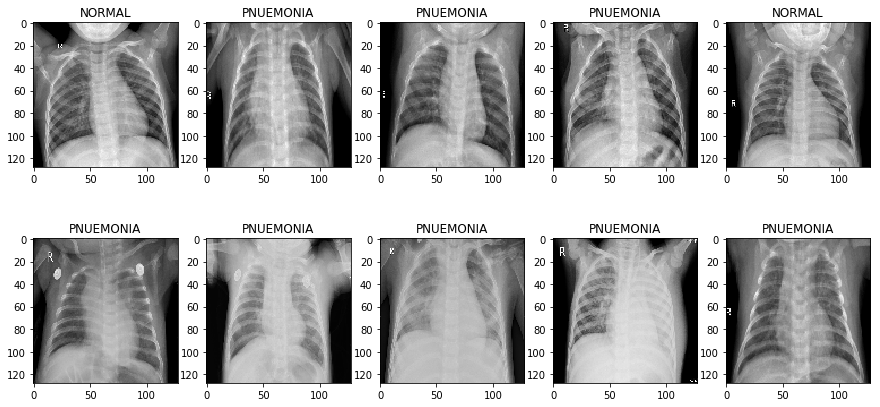

In [15]:
# Plotting some random images

import random
fig,ax = plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15,15)

for i in range(2):
    for j in range(5):
        l = random.randint(0,len(Y_train))
        ax[i,j].imshow(X_train[l])
        ax[i,j].set_title(str(Y_train[l]))
        ax[i,j].set_aspect('equal')

In [16]:
print(Y_train.shape)
print(y_test.shape)

(5216,)
(624,)


In [17]:
# Encoding the categories using OneHotEncoder
# As we have two classes here "NORMAL" , "PNEUMONIA", so the one hot encoded values will be
# NORMAL : [1,0]
# PNEUMONIA : [0,1]

enc = LabelEncoder()
Y_train = enc.fit_transform(Y_train)
y_test = enc.fit_transform(y_test)

In [18]:
Y_train.shape

(5216,)

In [19]:
y_test.shape

(624,)

In [20]:
Y_train[0:5]

array([0, 0, 0, 0, 0])

In [21]:
x_test.shape

(624, 128, 128, 3)

In [22]:
sgd = SGD(lr = 0.1 , decay = 1e-2 , momentum = 0.9 )

In [23]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3, 3), activation='sigmoid')) 
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3, 3), activation='sigmoid')) 
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [24]:
# This will give us a summary of our model

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)      

In [25]:
model.compile( loss = "binary_crossentropy" , optimizer  = 'adam' , metrics = ['accuracy'])

In [26]:
# Training our model 

model.fit(X_train,Y_train,epochs = 30, batch_size = 32)

Epoch 1/30
5216/5216 [==============================] - 6s 1ms/step - loss: 0.6288 - accuracy: 0.7331
Epoch 2/30
5216/5216 [==============================] - 2s 422us/step - loss: 0.5806 - accuracy: 0.7429
Epoch 3/30
5216/5216 [==============================] - 2s 415us/step - loss: 0.4725 - accuracy: 0.7544
Epoch 4/30
5216/5216 [==============================] - 2s 417us/step - loss: 0.3967 - accuracy: 0.7818
Epoch 5/30
5216/5216 [==============================] - 2s 441us/step - loss: 0.3200 - accuracy: 0.8332
Epoch 6/30
5216/5216 [==============================] - 2s 422us/step - loss: 0.2546 - accuracy: 0.9009
Epoch 7/30
5216/5216 [==============================] - 2s 416us/step - loss: 0.2161 - accuracy: 0.9271
Epoch 8/30
5216/5216 [==============================] - 2s 416us/step - loss: 0.1824 - accuracy: 0.9454
Epoch 9/30
5216/5216 [==============================] - 2s 411us/step - loss: 0.1880 - accuracy: 0.9411
Epoch 10/30
5216/5216 [==============================] - 2s 421us/

In [27]:
# Evaluating our model on testing data

loss , accuracy = model.evaluate(x_test , y_test , batch_size = 32)

print('Test accuracy: {:2.2f}%'.format(accuracy*100))

624/624 [==============================] - 0s 324us/step
Test accuracy: 71.63%


# Phew, we did it. Implemented our ConvNet that classifies/detects Pneumonia
